#**Introduction**
#**Bike Rental Demand Analysis**
## **Author:** Jainam Gogree
###**Bike Rentals:** An Overview

**1. Introduction:**\
The global trend toward eco-friendly transportation, convenience, and physical fitness has propelled the bike-sharing sector's explosive expansion in recent years. Cities all over the world are making significant investments in these systems to lessen traffic congestion and carbon footprints, with a projected global market value of $3.1 billion by 2025.\

A large-scale bike-sharing network is run by our client, a major American city. The city needs a data-driven strategy to predict usage patterns in order to maximize operations, guarantee adequate bike availability, and efficiently manage maintenance.

**2. Problem Statement:**\
Accurately predicting the demand for bike rentals in light of changing environmental and temporal conditions is the main challenge. Usage can be greatly impacted by variations in the weather, time of day, and season.

This analysis's objective is to:

* Create a Machine Learning Model: Construct a forecasting model to determine the quantity of bike rentals (RENTALS) during a specific day or time.

* Derive Insights: Determine the essential elements (features) that most strongly influence the demand for bike rentals.

**3. Dataset Overview:**\
The dataset used for this analysis includes historical bike rental data along with temporal and meteorological data.

There are 1,029 records in total.

'RENTALS' (number of bike rentals) is the target variable.

Important Features:

Temporal: Seasons, Holidays, Months, Days of the Week, Hours.

Temperature, humidity, wind speed, visibility, dew point temperature, UV index, precipitation, and snowfall are all considered aspects of the weather.

**4. Analysis Overview:**
* The following actions will be taken in this notebook:

* Data loading and cleaning involves checking the data for errors and missing values.

* Visualizing correlations between rental counts and weather/time factors is known as exploratory data analysis, or EDA.

* Scaling numerical features and encoding categorical variables are examples of data preprocessing.

* Model Building: Developing machine learning models to forecast demand.

* Evaluation: Determining the significance of features and evaluating model performance.

#**Environment Setup**

##**Importing libraries**

In [ ]:
# Importing libraries for my analysis

import matplotlib.pyplot as plt                      # data visualization
import numpy as np                                   # mathematical essentials
import pandas as pd                                  # data science essentials
import statsmodels.formula.api as smf                # regression modeling
from sklearn.model_selection import train_test_split # train-test split
import seaborn as sns                                # enhanced data viz.
import sklearn.linear_model                          # faster linear modeling
from sklearn.tree import DecisionTreeRegressor       # regression trees
from sklearn.tree import plot_tree                   # tree plots
import warnings

##**Importing Data**
Specifying the datset 'bike_rentals' and adding it to a newly created dataframe -> 'rentals'

In [ ]:
# specifying a file name
file = '/content/bike_rentals.xlsx'


# reading the file into Python through pandas
rentals = pd.read_excel(io = file)


# outputting the first 5 rows of the dataset
rentals.head(n = 5)

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Seasons,Holiday,RENTALS
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Yes,221
1,2,Jan,Sunday,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,0.0,Winter,Yes,130
2,3,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Yes,268
3,4,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Winter,Yes,335
4,5,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,Winter,Yes,299


##**Data Inspection**

###**Data info()**
Checking for the number of data entries as well as the null values

In [ ]:
rentals.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1029 non-null   int64  
 1   Month                  1029 non-null   object 
 2   Day of Week            1029 non-null   object 
 3   Hour                   1029 non-null   int64  
 4   Temperature            1029 non-null   float64
 5   Humidity               1029 non-null   int64  
 6   Wind Speed             1029 non-null   float64
 7   Visibility             1029 non-null   int64  
 8   Dew Point Temperature  1029 non-null   float64
 9   UV Index               1029 non-null   float64
 10  Rainfall               1029 non-null   float64
 11  Snowfall               1029 non-null   float64
 12  Seasons                1029 non-null   object 
 13  Holiday                1029 non-null   object 
 14  RENTALS                1029 non-null   int64  
dtypes: f

###**Data describe()**
This will give an overview of the distribution over the hours for initial analysis.

In [ ]:
rentals['Hour'].describe()

,Hour
count,1029.000000
mean,11.422741
std,6.854456
min,0.000000
25%,5.000000
50%,12.000000
75%,17.000000
max,23.000000


#**Task 1**
Understanding the main reasons people rent bikes, whether for leisure, exercise, or transportation

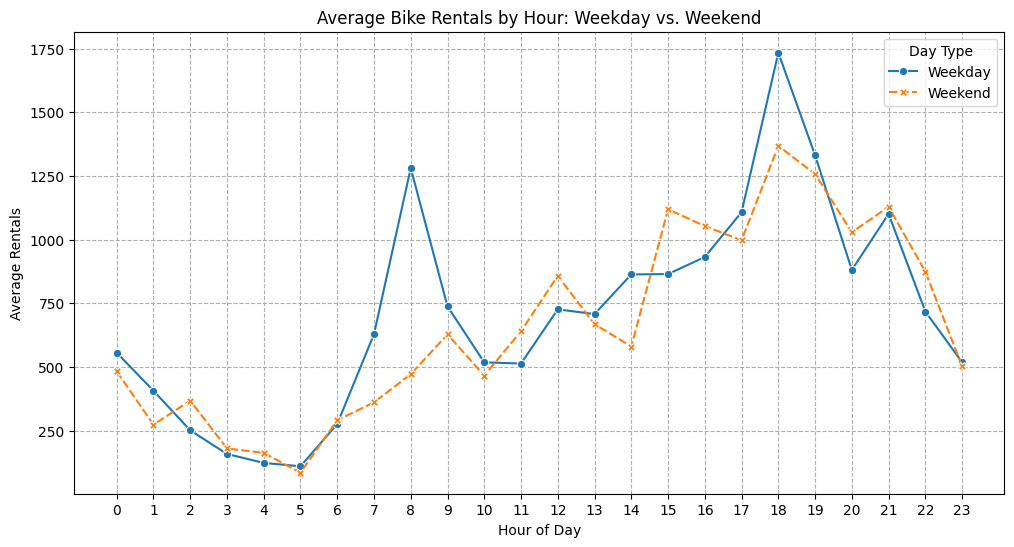

In [ ]:
# Grouping the days of the week into 'Weekdays' and 'Weekends
rentals['Day of Week'] = rentals['Day of Week'].replace({'Monday': 'Weekday',
                                                         'Tuesday': 'Weekday',
                                                         'Wednesday': 'Weekday',
                                                         'Thursday': 'Weekday',
                                                         'Friday': 'Weekday',
                                                         'Saturday': 'Weekend',
                                                         'Sunday': 'Weekend'})
# Calculating average rentals per hour for each day type
hourly_trends = rentals.groupby(['Hour', 'Day of Week'])['RENTALS'].mean()\
                                .reset_index()

# Plotting the pattern of rentals over the hours
plt.figure(figsize=(12, 6))

# Plotting a line plot for an understanding of the rentals based on hours
# Data is grouped by the day of the week
sns.lineplot(data=hourly_trends, x='Hour', y='RENTALS', hue='Day of Week',
             style='Day of Week', markers=True)

plt.title('Average Bike Rentals by Hour: Weekday vs. Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--')
plt.legend(title='Day Type')
plt.show()

In [ ]:
# Calculate average rentals per hour for each day type
hourly_trends = rentals.groupby(['Hour', 'Day of Week'])['RENTALS'].mean().reset_index()

# Filter for the specific hours 8 (8 AM) and 18 (6 PM)
peak_hours = hourly_trends[hourly_trends['Hour'].isin([8, 18])]

# Display the result
print(peak_hours)

    Hour Day of Week      RENTALS
16     8     Weekday  1281.000000
17     8     Weekend   471.500000
36    18     Weekday  1734.026316
37    18     Weekend  1367.923077


## **Weekly Findings of Average Bike Rentals by Hour**
The bike rental data analysis shows a clear usage pattern that strongly implies the main driver of demand is **commuting** to work or school.

**Weekday Rush Hour Peaks:** There are two notable increases in rental activity on weekdays.

Rentals soar to an average of 1,281 at morning peak (8 AM), which shows that the rentals are made for commute to the workplace or schools.

Evening Peak (6 PM): At an average of 1,734 rentals, there is a second significant peak. This is the time where most office timings and school timings commence, hence again proving that there is a high commnute rental of the bikes.

Off-Peak data: When people are at work or school, usage drastically decreases (averaging between 500 and 1000 rentals) between these times (e.g., 10 AM to 3 PM).

**Weekend Data Pattern:** During the weekends, the curve is completely different, having no sharp curves at the peak hours of commute. This suggests that there is minimal commute.
The rentals gradually increases during the afternoon, showing leisure. And the highest peak is noticed during the evening, making it evident of exercise as mostly people love exercising or travelling for leisure during evening hours on weekends.


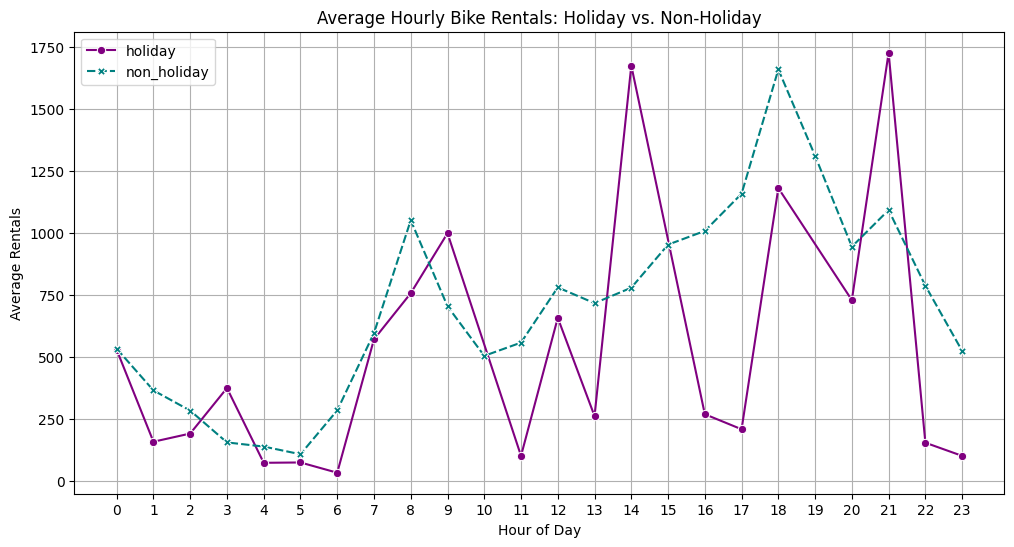

In [ ]:
rentals['Holiday'] = rentals['Holiday'].replace({'Yes': 'holiday',
                                                 'No': 'non_holiday'})

# Calculate average rentals per hour for each day type
hourly_trends = rentals.groupby(['Hour', 'Holiday'])['RENTALS'].mean()\
                                .reset_index()

my_palette = {'holiday': 'purple', 'non_holiday': 'teal'}

# Plot Holiday vs Non-Holiday
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trends, x='Hour', y='RENTALS', hue='Holiday',
             style='Holiday',palette= my_palette, markers=True)
plt.title('Average Hourly Bike Rentals: Holiday vs. Non-Holiday')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()

## **Holiday Findings of Average Bike Rentals by Hour**
Further analysis on the basis of holiday days, shows the same pattern, where on non-holidays, there is a peak of rentals in the commute hours i.e., 8 AM and 6 PM.
This backs the decision that the rentals are highly concentrated for the commute purpose.
Apart from that on holidays, there is a gradual increase in the rentals during the afternoon, which suggests leisure and the evening curve peak shows mostly a exercise purpose of rentals.
There is a definite relation between the commute and the rentals based on the data visualization, which implies that the rentals are made more for the purpose of commute vs for leisure and exercise.

Note: This is just an assumption based on the hourly pattern for the leisure and exercise rentals, there is not enough data backing for bifurcation between the two.


## **Analysis of the Hourly Rentals**
Daily commuting is unquestionably the primary driver of system demand, as demonstrated by the sharp, bi-modal volume spikes seen at 8 AM and 6 PM on non-holiday weekdays, according to the data-driven analysis of hourly rental trends. These high usage peaks demonstrate that the bike-sharing network serves primarily as a vital workforce transportation option, resulting in a predictable but operationally challenging fleet redistribution schedule. On the other hand, weekend and holiday patterns show a smoother, mid-afternoon surge, indicating a clear shift in consumer intent toward leisure and physical exercise. The lack of rush-hour volatility on these days strongly suggests that non-utilitarian usage is the dominant factor, even though the current dataset does not permit a granular segmentation between pure leisure and exercise. Reliability and capacity must therefore be given top priority during weekday commute windows in order to protect the system's most important source of income. Management can maximize fleet operations to serve the high-frequency commuter base while investigating distinct engagement strategies to take advantage of the flexible, recreational demand observed on weekends by recognizing this dual-market dynamic.

External Source:
Exploring the Weather Impact on Bike Sharing Usage Through a
Clustering Analysis. This report also proves the claim that there is bimodal spike in the rentals during commute hours. This also states that the holidays support rentals based on the leisure and exercise.

#**Task 2**
Developing a linear model for understanding the impact for each of the weather-related conditions on the number of rentals.

In [ ]:
# Dropping columns that are either not integer type or not related to weather
weather_conditions = rentals.drop(columns=['ID','Month','Day of Week', 'Hour',
                                           'Seasons','Holiday'])
weather_conditions.head(n = 5)

,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS
0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,221
1,-4.0,44,1.0,2000,-14.4,0.00,0.0,0.0,130
2,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,268
3,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,335
4,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,299


##**Correlation heatmap of factors affecting the rentals**

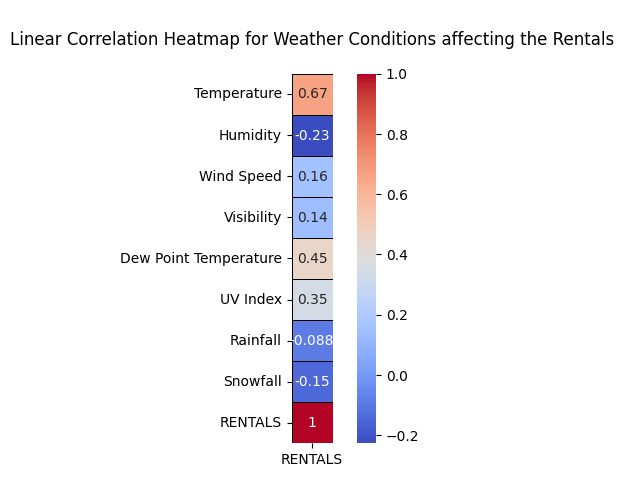

In [ ]:
# the correlation matrix for Rentals only, to avoid confusion and data-dumping
sns.heatmap(data       = weather_conditions.corr()[['RENTALS']],
            cmap       = 'coolwarm'   , # changing to coolwarm for understanding
            square     = True         , # tightening the layout
            annot      = True         , # printing values in the heatmap
            linecolor  = 'black'      , # lines between boxes
            linewidths = 0.5          ) # line thickness


# title
plt.title(label = """
Linear Correlation Heatmap for Weather Conditions affecting the Rentals
""")


# plotting the heatmap
plt.show(block = True)

##**Key Findings from the correlation matrix**
According to the correlation analysis, the most important environmental factor influencing bike rentals is temperature, whereas unfavorable factors like high humidity and precipitation serve as disincentives.

The main driver is temperature (strong positive correlation, +0.67): Temperature and rental demand are strongly positively correlated. Rentals rise dramatically as the temperature rises.

Humidity avoiding (Moderate Negative Correlation, -0.23): High humidity negatively impacts ridership. Customers are less likely to commute or exercise when the air feels muggy or uncomfortable.

Precipitation Sensitivity (Mild Negative Correlations): Snowfall (-0.15) and Rainfall (-0.09) both show negative correlations, reducing demand as expected. Interestingly, the negative impact of rainfall and snowfall is less severe than expected.

##**Linear Model Plot for temperature and rentals relation**
Instead of plotting a wholistic linear model, plotting in intervals and drawing a regression line from it explains a bit more.

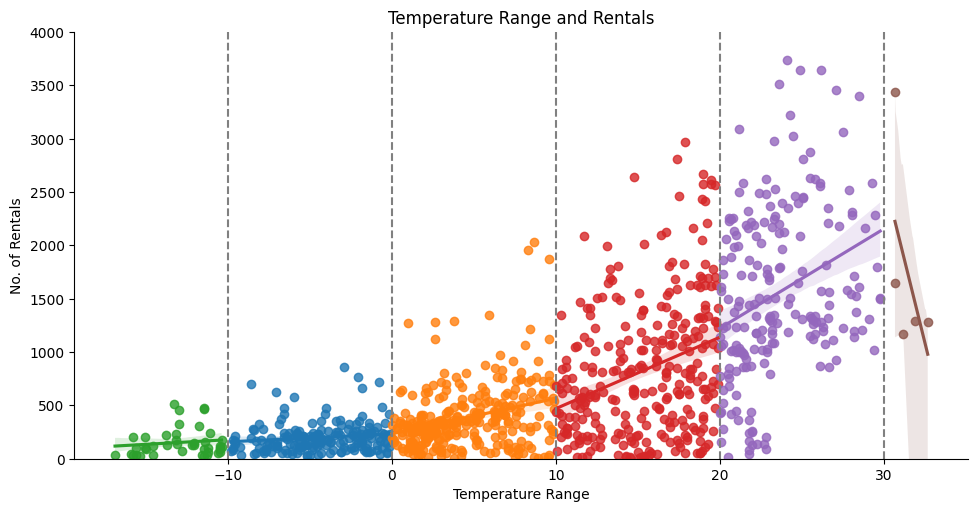

In [ ]:
# creating a dummy column in the diamonds DataFrame
weather_conditions['temperature_range'] = ''


# for loop with iterrows() <-- one of the most useful methods for DataFrames
for index, col in weather_conditions.iterrows():


    # conditionals to change the values in the new column
    if weather_conditions.loc[index, 'Temperature'] < -10:
        weather_conditions.loc[index, 'temperature_range'] = '[-inf, 10)'


    elif weather_conditions.loc[index, 'Temperature'] < 0:
        weather_conditions.loc[index, 'temperature_range'] = '[-10 - 0)'


    elif weather_conditions.loc[index, 'Temperature'] < 10:
        weather_conditions.loc[index, 'temperature_range'] = '[0 - 10)'


    elif weather_conditions.loc[index, 'Temperature'] < 20:
        weather_conditions.loc[index, 'temperature_range'] = '[10 - 20)'


    elif weather_conditions.loc[index, 'Temperature'] >= 30:
        weather_conditions.loc[index, 'temperature_range'] = '[30 - inf)'


    # safety net
    else:
        weather_conditions.loc[index, 'temperature_range'] = 'error'


# instantiating an lmplot for Temperature and Rentals
sns.lmplot(x          = 'Temperature',
           y          = 'RENTALS'     ,
           hue        = 'temperature_range', # categorical data for subsets
           legend     = False       , # supressing the legend
           scatter    = True        ,
           fit_reg    = True        ,
           aspect     = 2           ,
           data       = weather_conditions    )


# developing vertical axis lines
value = -10

while value <= 30:

    # making a vertical line
    plt.axvline(x = value, color = "grey", linestyle = '--')

    # incrementing value in one-quarter increments
    value += 10


# formatting and displaying the plot
plt.title       (label  = 'Temperature Range and Rentals')
plt.xlabel      (xlabel = 'Temperature Range'          )
plt.ylabel      (ylabel = 'No. of Rentals'           )
plt.ylim(0, 4000)
plt.show        (block  = True                    )

##**Findings of the Linear Model plot**
The segmented regression analysis reveals that the relationship between temperature and bike rentals is not uniform but varies drastically across different thermal brackets. In the coldest ranges ([-inf, 10) and [-10 - 0)), the demand is consistently low and flat, indicating that below-freezing temperatures create a "floor" where almost no rental activity occurs regardless of minor fluctuations. As temperatures rise into the [0 - 10) and [10 - 20) zones, the regression lines begin to slope upwards more steeply, showing that users become increasingly responsive to every degree of warming. The most aggressive growth is seen in the category representing 20°C – 30°C, where the data points cluster highest on the y-axis, representing the "sweet spot" for maximum ridership. Interestingly, the [30 - inf) category shows a potential dip in the trend, suggesting a "heat ceiling" where extreme heat begins to deter riders just as cold does. Finally, the vertical dashed lines clearly demarcate these behavioral shifts, visually proving that customer demand operates in distinct "phases" rather than a single continuous linear progression.

##**Analysis of the Linear plot**
Looking at the linear plot in terms of temperature, it shows we need a layered approach to operations. This setup revolves around that just right range from 20 degrees C to 30 degrees C. Demand picks up naturally there. So, you have to roll out the entire fleet and all staff to grab the highest revenues possible. Warmer temps tend to boost how many people ride along in general. Still, that link tops out once you pass 30 degrees C. Extreme heat starts pushing folks away then. It works a lot like extreme cold does in that way. You reach a spot where extra effort just does not pay off anymore. At that stage, better to focus on handling the heat. Do not try to expand hard. The numbers point out that anything below zero degrees C creates a real wall for regular users. No one wants to deal with that kind of cold. Putting money into promotions during those times ends up pointless. Those stretches turn into what you call Maintenance Mode instead. Use them to fix up the fleet and shift resources around. All this means skipping a simple split between warm and cold seasons. The operation needs to shift to four clear phases. One is Maintenance for below 0 degrees C. Next comes Growth from 0 degrees C to 20 degrees C. Then Peak Operations runs from 20 degrees C to 30 degrees C. Finally, Heat Management kicks in above 30 degrees C. This lines up how you use resources with the actual ways customers respond to the weather.



##**Using the OLS regression analysis**
The spread in the regression line and the datapoints from the above plot suggest the interference or affect of other parameters other than Temperature in the demand for rentals. The ols method helps us understand the measure of effect of other parameters on the rentals.

In [ ]:
# Rename 'UV Index' to 'UV_Index' for easier use in formulas
weather_conditions = weather_conditions.rename(columns={'UV Index': 'UV_Index',
                                                         'Wind Speed': 'Wind_Speed',
                                                         'Dew Point Temperature':
                                                        'Dew_Point_Temperature'})

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """RENTALS ~ Temperature +
                                          Humidity +
                                          Wind_Speed +
                                          Visibility +
                                          Dew_Point_Temperature +
                                          UV_Index +
                                          Rainfall +
                                          Snowfall
                                          """,
                                data = weather_conditions)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                RENTALS   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     177.0
Date:                Sat, 13 Dec 2025   Prob (F-statistic):          6.42e-187
Time:                        23:33:15   Log-Likelihood:                -7778.1
No. Observations:                1029   AIC:                         1.557e+04
Df Residuals:                    1020   BIC:                         1.562e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1601.92

##**Analysis of the OLS regression**
The OLS regression results indicate that the included weather variables collectively explain approximately 58.1% of the variance in bike rentals ($R^2 = 0.581$), with the overall model being statistically significant ($p < 0.001$). Surprisingly, the main Temperature variable is not statistically significant ($p = 0.436$), likely because its effect is captured by the highly correlated Dew Point Temperature, which is a significant positive predictor. High Humidity, UV Index, and Rainfall all show statistically significant negative coefficients, confirming that muggy, wet, or intense-sun conditions deter bike rentals. Conversely, Visibility and Wind Speed display significant positive relationships with rentals, suggesting that clearer, breezier days are associated with higher usage despite the potential resistance of wind. The model also produces a counterintuitive significant positive coefficient for Snowfall, which may be an artifact of the data distribution or interaction effects rather than a genuine behavioral driver. Finally, the very large condition number implies the presence of strong multicollinearity among the predictors, warning that individual coefficient estimates—such as the unexpected result for Snowfall—should be interpreted with caution.

External Source:
The source states that the bikers avoided the higher temperatures as well as extreme lower temperatures. There is evidence that Humidity also plays an important role in the bikers behaviors.

In [ ]:
# one hot encoding categorical variables for 'Seasons'
rentals = pd.get_dummies(data = rentals,
                          columns = ['Seasons'], # Specify 'Seasons' column
                          prefix = 'Seasons',
                          dtype  = int)


# checking results
rentals.head(n = 5)

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Holiday,RENTALS,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1,Jan,Weekend,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,holiday,221,0,0,1
1,2,Jan,Weekend,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,0.0,holiday,130,0,0,1
2,3,Jan,Weekend,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,holiday,268,0,0,1
3,4,Jan,Weekend,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,holiday,335,0,0,1
4,5,Jan,Weekend,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,holiday,299,0,0,1


In [ ]:
# renaming the season columns
rentals.rename(columns = {'Seasons_Summer': 'Summer',
                            'Seasons_Spring': 'Spring',
                            'Seasons_Winter': 'Winter'},
                inplace = True)


# checking results
rentals.head(n = 5)

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Holiday,RENTALS,Spring,Summer,Winter
0,1,Jan,Weekend,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,holiday,221,0,0,1
1,2,Jan,Weekend,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,0.0,holiday,130,0,0,1
2,3,Jan,Weekend,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,holiday,268,0,0,1
3,4,Jan,Weekend,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,holiday,335,0,0,1
4,5,Jan,Weekend,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,holiday,299,0,0,1


In [ ]:

rentals[ ['Summer', 'Spring', 'Winter'] ].sum()

,0
Summer,158
Spring,520
Winter,351


In [ ]:
# dropping Summer to analyse on the basis of the same
rentals = rentals.drop(['Summer', # category to drop
                           'Holiday',
                           'Day of Week',
                           'ID' # not adding value
                          ], axis = 1)


# checking results
rentals.head(n = 5)

,Month,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS,Spring,Winter
0,Jan,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,221,0,1
1,Jan,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,0.0,130,0,1
2,Jan,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,268,0,1
3,Jan,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,335,0,1
4,Jan,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,299,0,1


In [ ]:
## x-side ##
x_all  = rentals.drop(labels = 'RENTALS', axis = 1)
x_base = rentals[ ['Temperature','Humidity','Wind Speed', 'Visibility','Dew Point Temperature','UV Index', 'Rainfall', 'Snowfall'] ]

## y-side ##
y_original = rentals['RENTALS']

In [ ]:
# x-data
x_data = x_base

# y_data
y_data = y_original

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.4,
                                                    random_state = 800)

In [ ]:
# checking results
print(f"""
Data Shapes
-----------
x_train: {x_train.shape}
y_train: {y_train.shape}

x_test:  {x_test.shape}
y_test:  {y_test.shape}
""")


Data Shapes
-----------
x_train: (617, 8)
y_train: (617,)

x_test:  (412, 8)
y_test:  (412,)



The number of samples in the train set are 617, which is a good number for the model.

In [ ]:
# naming the model
model_name = "Linear Regression"


# INSTANTIATING model object
model = sklearn.linear_model.LinearRegression()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.5641
Testing Score  : 0.5912
Train-Test Gap : -0.0271


The train-test gap is 0.02 which less than 0.05, which shows that the model is a good fit.

In [ ]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)


# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', np.float64(2004.7964))
('Temperature', np.float64(-8.0962))
('Humidity', np.float64(-26.1693))
('Wind Speed', np.float64(65.3778))
('Visibility', np.float64(0.114))
('Dew Point Temperature', np.float64(62.4))
('UV Index', np.float64(-90.3069))
('Rainfall', np.float64(-30.2434))
('Snowfall', np.float64(100.0532))


In [ ]:
# dynamically printing model summary
ols_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ols_model)

Model Name:     Linear Regression
Train_Score:    0.5641
Test_Score:     0.5912
Train-Test Gap: -0.0271

Coefficents
-----------
                 Feature  Coefficient
0              intercept    2004.7964
1            Temperature      -8.0962
2               Humidity     -26.1693
3             Wind Speed      65.3778
4             Visibility       0.1140
5  Dew Point Temperature      62.4000
6               UV Index     -90.3069
7               Rainfall     -30.2434
8               Snowfall     100.0532


In [ ]:
# model is created from blueprint and data
model_fit = model.fit(x_train, y_train)


# printing model attributes
print(f"""
Intercept
---------
{round(model_fit.intercept_, ndigits = 2)}


Coefficients
------------
{model_fit.coef_.round(decimals = 2)}


Total X-Features
----------------
{model_fit.n_features_in_}
""")


Intercept
---------
2004.8


Coefficients
------------
[ -8.1  -26.17  65.38   0.11  62.4  -90.31 -30.24 100.05]


Total X-Features
----------------
8



In [ ]:
# applying model to validation set
model_pred = model.predict(x_test)


# printing predictions (validation set)
print(model_pred.round(decimals = 0).astype(dtype = int))

[ 438 1028  260  721  153 1273  576  -27  492 1517  896 1469  -34  745
  101  764 1314  -67 1575  -99  519  458  479 1887  479 1368   31 1387
  919  978 1196   18 1506   91  380 -279 1329  -60 -455   54  537  -33
  800 1806  474  356  870  719 1490 1052  717 1267 1670 -340  793 1268
 1170 1454  281  524  496  906 1071 1196  189  194  737   26 1507  493
 1153  471 1171 1519 1201  291 1438  225  251 1675  287  598  190  -69
  119  -79   30  -53  770  517  598  186  350  327  667  110  949  851
 1833 -215  248  652  934 -127 1189  813  427  554  606 1480  357  152
  409  603 1923  618  649  274 1202 -201 1811   81  989   75   86 1202
  542  964  772 1041   91 1298 1598  606  491  196  741  234 1755 -165
  664  167  604  112 1666 1605  -48 1333  797  518  760 1151  732  402
  961 1034  583 1668 1718 1056 1323  584  117  453 -334  960  -86  880
 1327  917  269  440 1588 1165 1305   52  917  977 1048  278  685 1690
  498  995 1250  215 1133 1013  619  922 -259   84 1319  882  253 -155
  775 

In [ ]:
## Residual Analysis ##

# organizing residuals
model_residuals = {
    "True"            : y_test,
    "Predicted"       : model_pred.round(decimals = 0).astype(dtype = int)
}


# converting residuals into df
resid_df = pd.DataFrame(data = model_residuals)


# checking results
resid_df.head(n = 5)

,True,Predicted
325,400,438
714,1010,1028
229,238,260
12,330,721
483,506,153


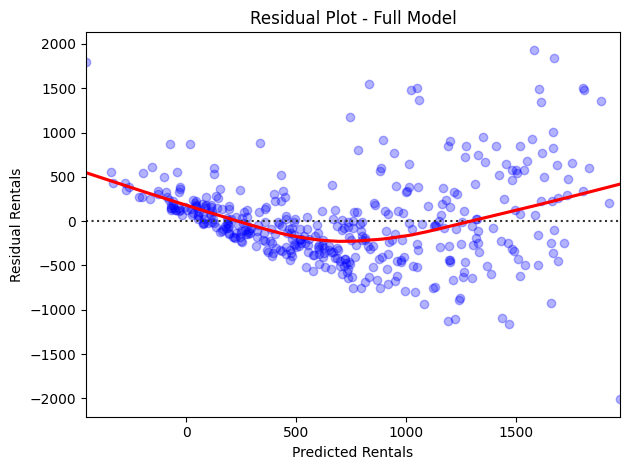

In [ ]:
# developing a residual plot
sns.residplot(data        = resid_df,
              x           = 'Predicted',
              y           = 'True',
              lowess      = True,
              color       = 'blue',
              scatter_kws = {'alpha': 0.3},   # data point transparency
              line_kws    = {'color': 'red'}) # line color


# title and axis labels
plt.title(label   = "Residual Plot - Full Model")
plt.xlabel(xlabel = "Predicted Rentals")
plt.ylabel(ylabel = "Residual Rentals")


# layout and rendering visual
plt.tight_layout()
plt.show()

##**Interpretation of the residual plot**
The residual plot shows that there is a non collinearity in the predictions. This implies that, the model does not predict all the values correctly.
The spread from the line shows a funnel shape which means that the predictions are highly skewed and the linear model only predicts low rental days correctly.
But when it comes to predicting high - demand days, it becomes more erratic and unpredictable based on the prediction model.
The red line - lowess line, is not flat at 0, which means the model is under fit for the lower demands whereas over-fit for the higher demand days.
There is a higher variance noticed, which means as the demand increases, there is a higher spread in the prediction, showing the the linear model is not perfect when it comes to predicting based on the variance and the mean error of the data.

#**Task 3**
Developing a regression tree for determining the rentals' demand for the purpose of maintenance.

In [ ]:
# Developing model for the regression
x_data = rentals[ ['Hour','Temperature','Humidity','Wind Speed', 'Visibility','Dew Point Temperature','UV Index', 'Rainfall', 'Snowfall'] ]
# Train-Test Split (matching the reference notebook parameters)
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.1,
                                                    random_state=300)

# Instantiating the Model
# Using the pruned tree parameters from the reference: depth 4, min_leaf 10
model = DecisionTreeRegressor(max_depth=4,
                              min_samples_leaf=10,
                              random_state=702)

# Fitting the model
model.fit(x_train, y_train)

# Scoring the model
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
print(f"Training Score: {train_score:.4f}")
print(f"Testing Score:  {test_score:.4f}")
# Perform subtraction on float values, then format the result
print(f'Train-Test Gap : {(train_score - test_score):.4f}')

Training Score: 0.7892
Testing Score:  0.7891
Train-Test Gap : 0.0001


The train-test gap is 0.02 which less than 0.05, which shows that the model is a good fit.

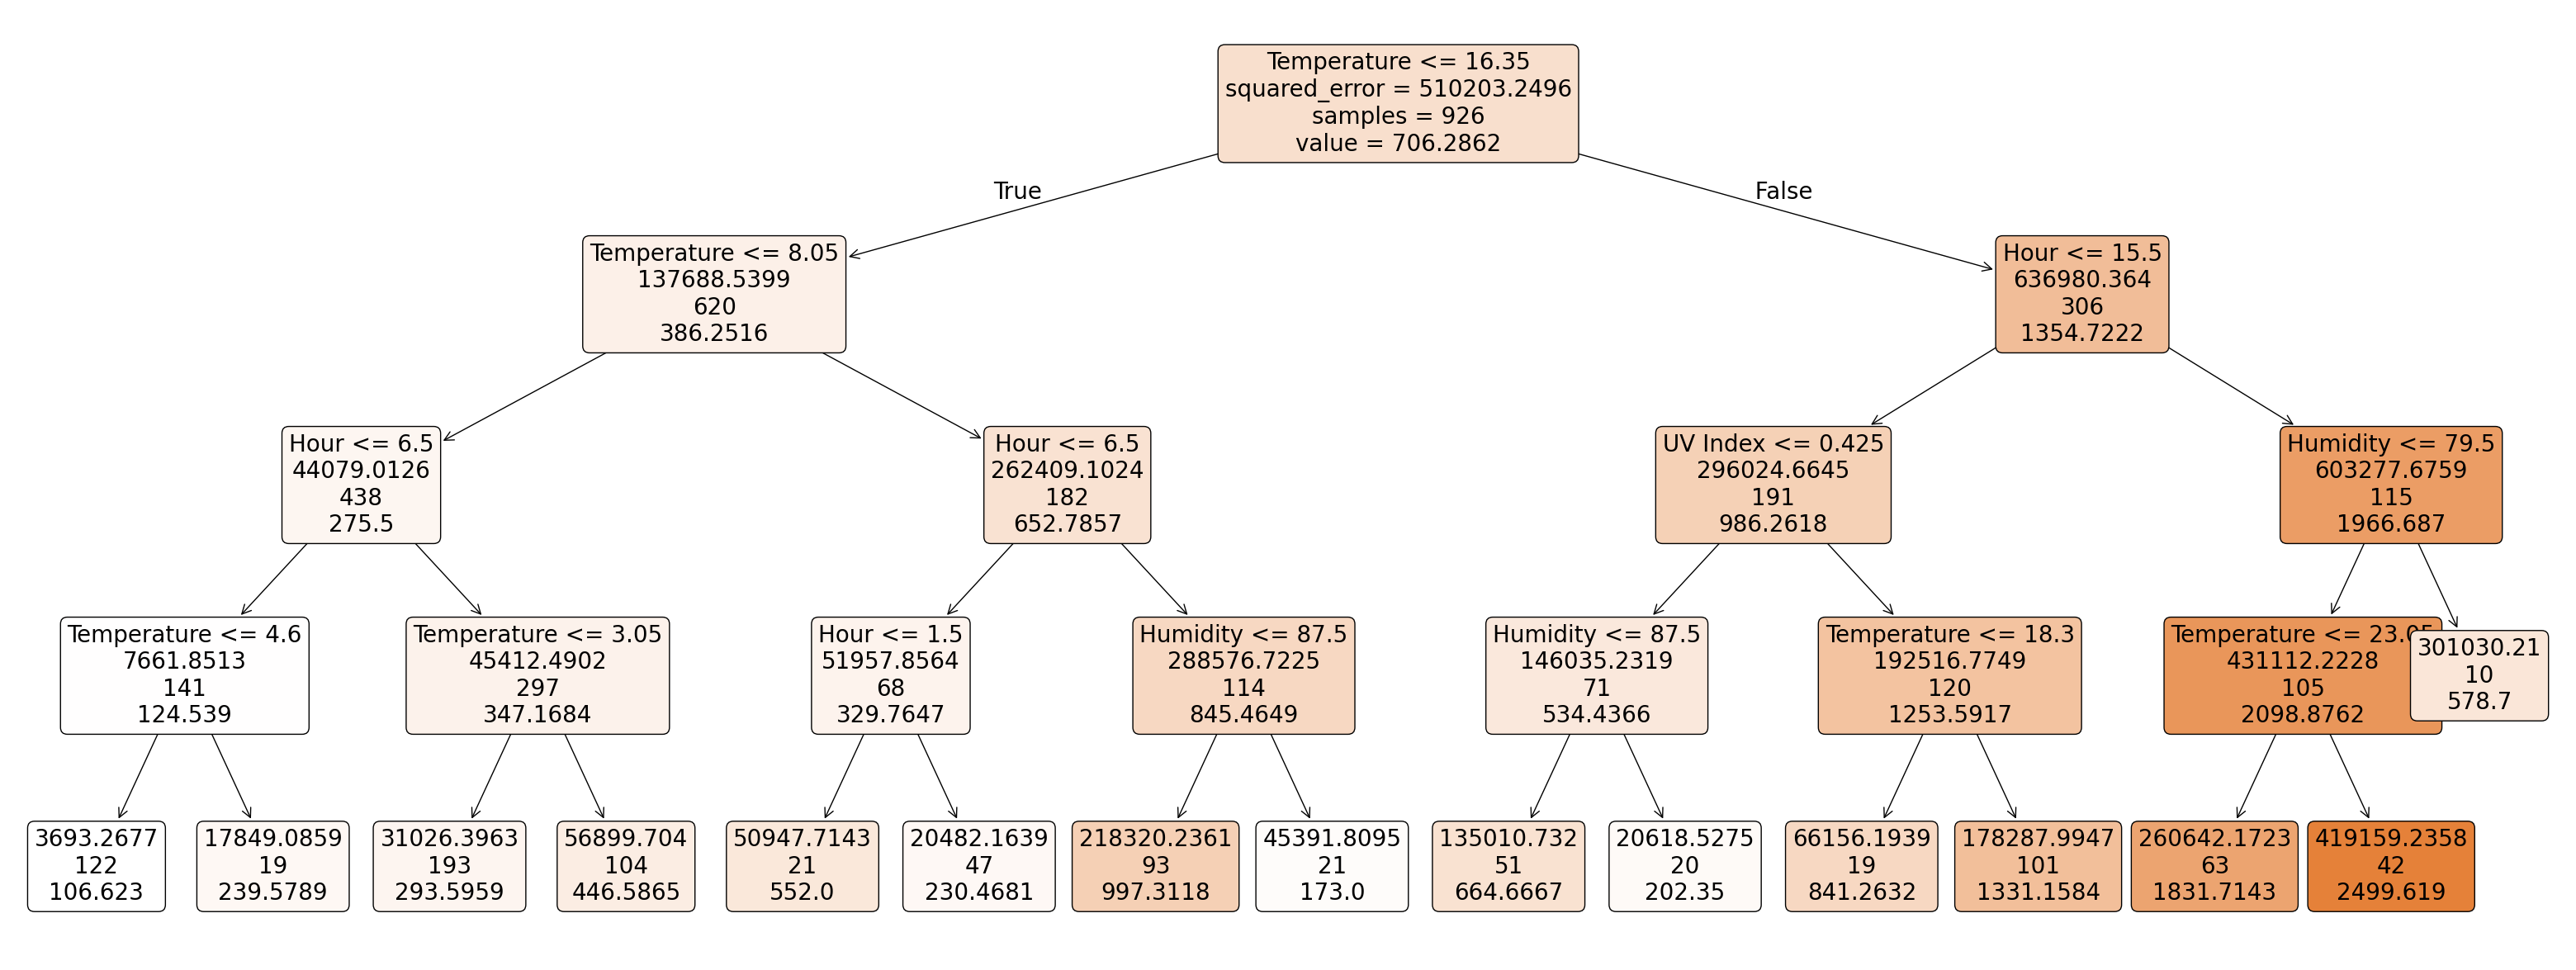

In [ ]:
# setting figure size
plt.figure(figsize=(40, 15)) # adjusting for better visual


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True,
          rounded       = True,
          fontsize      = 20,
          label         = 'root', # optional asthetics
          precision     = 4)


# rendering the plot
plt.show()

##**Analysis of the Regression Tree**
If the temperature is more than 16.35 C, the model predicts a higher a number of rentals correctly.
The temperature below 16.35 C, shows a poor prediction of values of rentals, stating the best path is the one on the right.
Further when the humidity is moderate, less than 79.5, the values are well predicted.
The best fit path for the analysis is when the temperature range is greater than 23.05 C. where humidity is less than 79.5.
Here the number of rentals predicted is almost 2500.
For lower temperatures, there is very less demand between temperature and the rentals.
Another huge factor is time of the day, when the time is between 8 and 15.5 hours, the traffic is less.
For maintenance purposes, the perfect temperature is below 8 C where the demand is very low, and the bikes are available.
Also when the humidity is more than 87.5, the rentals tend to decrease too. So on a day wherre it is going to be all sweaty, the number of bikes unused will be less, making it perfect for the maintenance.
UV index, also not being a strong feature, does play an important role for the prediction of rentals, where higher UV index implies lesser rentals as compared to other days.

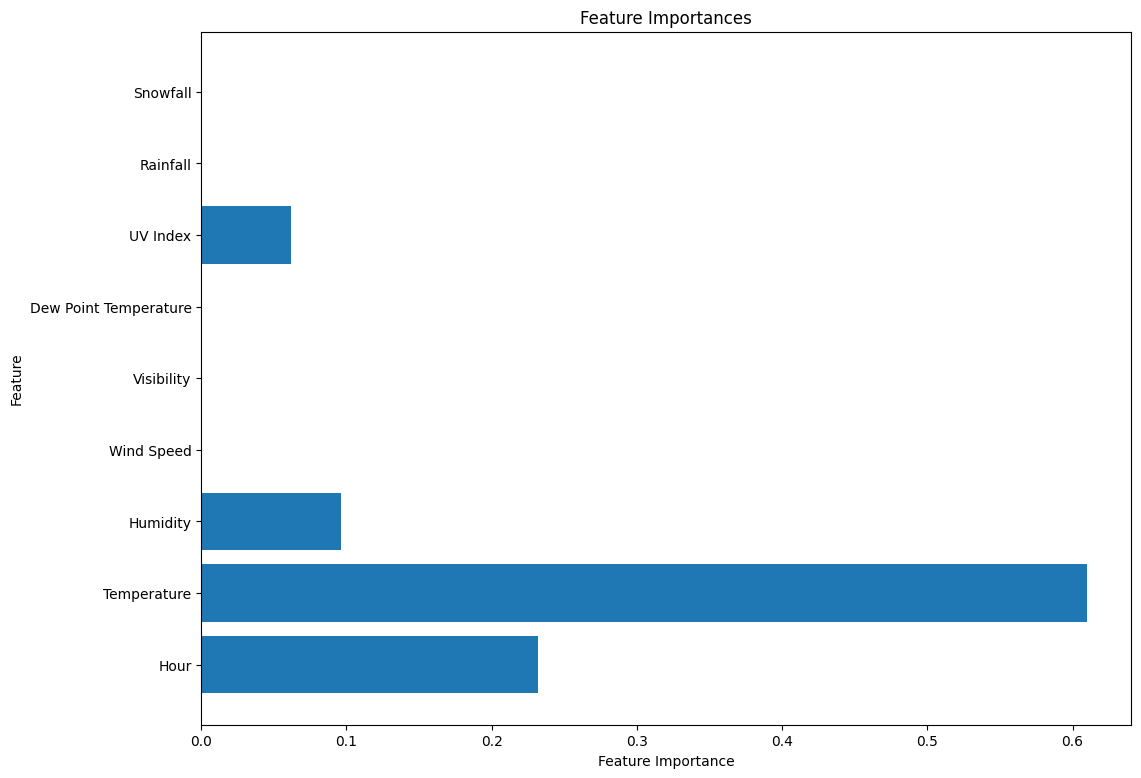

In [ ]:
def plot_feature_importances(model, train, export = False):
    # declaring the number of features
    n_features = train.shape[1]

    # setting plot size
    fig, ax = plt.subplots(figsize=(12,9))

    # plotting feature importances
    plt.barh(width = model.feature_importances_,
             y     = train.columns)

    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances")


    if export == True:
        plt.savefig('Feature Importances.jpeg')

    plt.show()


# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)

##**Feature Importance**
The top 2 features based on the regression tree are Temperature and Humidity.
Higher temperatures have a positive correlation with rentals.
Lower Humidity on the other hand has better correlation with the rentals.

#**Final Model Selection**
##**Regression Tree Model:**
The regression tree model is better here, for predicting the rentals.
It is observed that when the temperature is low, the rentals tend to be less in demand.
At the time of office hours, the rentals are predicted very well, which imply better availability of bikes.
Also at higher humidity levels, the rentals are observed to be lesser too.
This model correctly predicts that the rentals are highly weather dependent.

###**Top conclusions from the Regression tree**
The operational temperature for rentals highly between 15 and 30 C. This is because the bikers may avoid the cold temperatures due to the wind and cold freezes they suffer during commute. And they prefer other ventilated or heated modes of transport.
The rental density highly depends on the temperature and hour altogether.
When the temperature is below the freezing point or near it, this presents a perfect time for maintenance of bikes as the demands shrinks drastically.
The noise factors like Wind speed, Visibility, rainfall and Snowfall are totally neglected here, which appear in the linear model. This is why the predictions get enhanced in the regression tree.
Apart from that, when the time is after 8 AM and before the 4pm mark, the rentals drop due to the office hours. This makes the time of the day, the second best feature of the model.

Summarizing:


*   The rentals are highly dense during peak commute hours 8AM and 6PM.
*   The best time for maintenance is before 7 AM and after 8PM.
*   The rentals are avoided in temperature below 8 C and above 30 C
*   When the humidity goes up, bikers experience sweat, hence the rentals are lower at the time.
*   The best season to experience higher demand is during Spring and Summer, where the bikers also commute and also use bikes for leisure and exercise.
*   On holidays, the rentals are not concentrated at certain times, hence using other factors like temperature and humidity, the rentals can be predicted.
* The most ideal prediction using the tree is when the temperature is above 23 and above, after 4PM  and when the humidity is higher than 80.
* The company can focus on deploying their fleet, when the temperature is optimum - between 15 and 30 C, on non-holidays when the commute hours are on between 7 to 9 Am and 5 to 7 PM.






#**References**
* Quach, J., & Malekian, R. (2022). Exploring the weather impact on bike sharing usage through a clustering analysis. Journal of Computers, 33(5), 163–173. https://csroc.org.tw/journal/JOC33-5/JOC3305-14.pdf
* Gemini. [gemini.google.com](https://gemini.google.com)
* Gemini. https://gemini.google.com/app/ce908c37c212e91b